In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/dat.csv')

X = df.drop(['grade'], axis = 1)
y = df.grade

In [7]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0,
    shuffle = True,
    stratify = None
)

In [8]:
print('trainX shape: ',train_X.shape)
print('trainy shape: ',train_y.shape)
print('testX shape: ', test_X.shape)
print('testy shape: ', test_y.shape)

trainX shape:  (292, 10)
trainy shape:  (292,)
testX shape:  (74, 10)
testy shape:  (74,)


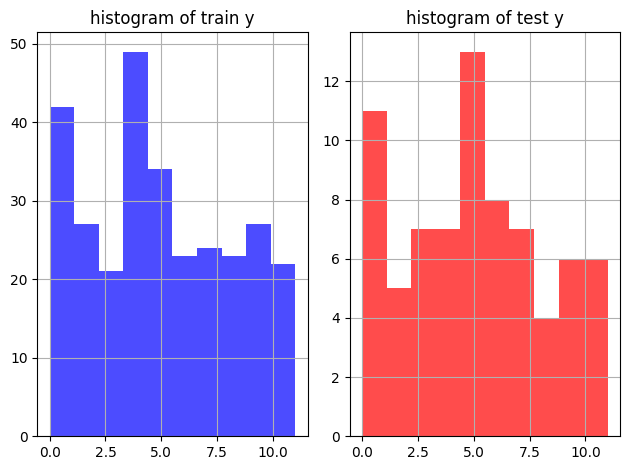

In [ ]:
# 타겟 변수를 기준으로 훈련, 테스트 데이터 분포의 유사성 파악
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2)

train_y.hist(ax=axs[0], color = 'blue', alpha = 0.7)
axs[0].set_title('histogram of train y')

test_y.hist(ax=axs[1], color = 'red', alpha = 0.7)
axs[1].set_title('histogram of test y')
plt.tight_layout();
plt.show();

In [ ]:
# 결측치 처리
print(df.isna().sum(axis=0))

school       0
sex          0
paid         0
famrel       0
freetime     0
goout       10
Dalc         0
Walc         0
health       0
absences     0
grade        0
dtype: int64


In [2]:
# 평균 대치법

from sklearn.impute import SimpleImputer
# 훈련 데이터, 테스트 데이터 복사
train_X1 = train_X.copy()
test_X1 = test_X.copy()
imputer_mean = SimpleImputer(strategy = 'mean')

# goout 변수의 결측치를 평균으로 대치하고 저장
train_X1['goout'] = imputer_mean.fit_transform(train_X1[['goout']])
test_X1['goout'] = imputer_mean.transform(test_X1[['goout']])

print('학습 데이터 goout 변수 결측치 확인:', train_X1['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인:', test_X1['goout'].isna().sum())

NameError: name 'train_X' is not defined

In [ ]:
# 중앙값 대치법

train_X2 = train_X.copy()
test_X2 = test_X.copy()
imputer_median = SimpleImputer(strategy = 'median')

train_X2['goout'] = imputer_median.fit_transform(train_X2[['goout']])
test_X2['goout'] = imputer_median.transform(test_X2[['goout']])

print('학습 데이터 goout 변수 결측치 확인: ', train_X2['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인: ', test_X2['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인:  0
테스트 데이터 goout 변수 결측치 확인:  0


In [ ]:
# 최빈값 대치법

train_X3 = train_X.copy()
test_X3 = test_X.copy()

imputer_mode = SimpleImputer(strategy = 'most_frequent')
train_X3['goout'] = imputer_mode.fit_transform(train_X3[['goout']])
test_X3['goout'] = imputer_mode.transform(test_X3[['goout']])

print('학습 데이터 goout 변수 결측치 확인: ', train_X3['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인: ', test_X3['goout'].isna().sum())

In [ ]:
# KNN(K-nearest Neighbors)을 이용한 대치법

from sklearn.impute import KNNImputer
train_X5 = train_X.copy()
test_X5 = test_X.copy()

# 수치형 칼럼만 선택
train_X5_num = train_X5.select_dtypes('number')
test_X5_num = test_X5.select_dtypes('number')
train_X5_cat = train_X5.select_dtypes('object')
test_X5_cat = test_X5.select_dtypes('object')

# 이웃의 크기가 5인 KNN 모형의 예측값을 이용
knnimputer = KNNImputer(n_neighbors = 5)

train_X5_num_imputed = knnimputer.fit_transform(train_X5_num)
test_X5_num_imputed = knnimputer.transform(test_X5_num)

# KNNImputer는 np.array로 출력되므로 데이터 프레임 형태로 변환
train_X5_num_imputed = pd.DataFrame(
    train_X5_num_imputed,
    columns = train_X5_num.columns,
    index = train_X5.index
)

test_X5_num_imputed = pd.DataFrame(
    test_X5_num_imputed,
    columns = test_X5_num.columns,
    index = test_X5.index
)

# 수치형 데이터와 범주형 데이터를 결합하여, 원 데이터 형태로 만듦
train_X5 = pd.concat([train_X5_cat, train_X5_num_imputed], axis = 1)
test_X5 = pd.concat([test_X5_cat, test_X5_num_imputed], axis = 1)

print('학습 데이터 goout 변수 결측치 확인: ', train_X5['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인: ', test_X5['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인:  0
테스트 데이터 goout 변수 결측치 확인:  0


In [ ]:
knnimputer2 = KNNImputer(n_neighbors = 5).set_output(transform = 'pandas')
train_X5_num_imputed2 = knnimputer2.fit_transform(train_X5_num)
test_X5_num_imputed2 = knnimputer2.transform(test_X5_num)

# 판다스 데이터 프레임 출력
print(train_X5_num_imputed2.head())

     famrel  freetime  goout  Dalc  Walc  health  absences
63      4.0       1.0    3.0   1.0   3.0     4.0       2.0
241     5.0       3.0    2.0   1.0   1.0     3.0       1.0
306     4.0       3.0    3.0   1.0   2.0     4.0       4.0
317     4.0       3.0    3.0   2.0   2.0     2.0       0.0
245     4.0       3.0    4.0   2.0   2.0     4.0       8.0


In [ ]:
print('학습 데이터 goout 변수 결측치 확인: ', train_X5_num_imputed2['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인: ', test_X5_num_imputed2['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인:  0
테스트 데이터 goout 변수 결측치 확인:  0


In [ ]:
data = {
    '학생' : ['철수', '영희', '민수', '수지', '지현'],
    '수학' : [85, np.nan, 78, np.nan, 93],
    '영어' : [np.nan, 88, 79, 85, np.nan],
    '과학' : [92, 85, np.nan, 80, 88]
}
df = pd.DataFrame(data)

In [ ]:
df1 = df.copy()
df1['수학'].fillna(df1['수학'].mean(), inplace = True)
df1['영어'].fillna(df1['영어'].mean(), inplace = True)
df1['과학'].fillna(df1['과학'].mean(), inplace = True)
print(df1)

   학생         수학    영어     과학
0  철수  85.000000  84.0  92.00
1  영희  85.333333  88.0  85.00
2  민수  78.000000  79.0  86.25
3  수지  85.333333  85.0  80.00
4  지현  93.000000  84.0  88.00


<ipython-input-22-c575ccb4476f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['수학'].fillna(df1['수학'].mean(), inplace = True)
<ipython-input-22-c575ccb4476f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
df2 = df.copy()
df2['수학'].fillna(0, inplace = True)
print(df2)

   학생    수학    영어    과학
0  철수  85.0   NaN  92.0
1  영희   0.0  88.0  85.0
2  민수  78.0  79.0   NaN
3  수지   0.0  85.0  80.0
4  지현  93.0   NaN  88.0


<ipython-input-23-8360491f0c44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['수학'].fillna(0, inplace = True)


In [ ]:
df2_1 = df.copy()
df2_1.fillna(50, inplace=True)
print(df2_1)

   학생    수학    영어    과학
0  철수  85.0  50.0  92.0
1  영희  50.0  88.0  85.0
2  민수  78.0  79.0  50.0
3  수지  50.0  85.0  80.0
4  지현  93.0  50.0  88.0


In [ ]:
df2['영어'].fillna(method = 'ffill', inplace = True)
print(df2)

   학생    수학    영어    과학
0  철수  85.0   NaN  92.0
1  영희   0.0  88.0  85.0
2  민수  78.0  79.0   NaN
3  수지   0.0  85.0  80.0
4  지현  93.0  85.0  88.0


<ipython-input-26-df594d21ac2d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['영어'].fillna(method = 'ffill', inplace = True)
<ipython-input-26-df594d21ac2d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['영어'].fillna(method = 'ffill', inplace = True)


In [ ]:
df2['과학'].fillna(method = 'bfill', inplace = True)
print(df2)

   학생    수학    영어    과학
0  철수  85.0   NaN  92.0
1  영희   0.0  88.0  85.0
2  민수  78.0  79.0  80.0
3  수지   0.0  85.0  80.0
4  지현  93.0  85.0  88.0


<ipython-input-27-0b597520c4db>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['과학'].fillna(method = 'bfill', inplace = True)
<ipython-input-27-0b597520c4db>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['과학'].fillna(method = 'bfill', inplace = True)


In [ ]:
df3 = df.copy()
df3['수학'].fillna(df['영어'], inplace = True)
print(df3)

   학생    수학    영어    과학
0  철수  85.0   NaN  92.0
1  영희  88.0  88.0  85.0
2  민수  78.0  79.0   NaN
3  수지  85.0  85.0  80.0
4  지현  93.0   NaN  88.0


<ipython-input-28-d22435438ed0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['수학'].fillna(df['영어'], inplace = True)


In [ ]:
# 각 칼럼의 평균값으로 결측치 채우기

df4 = df.copy()
df4_num = df4.select_dtypes('number')
df4_num = df4_num.apply(lambda col: col.fillna(col.mean()))
df4[df4_num.columns]=df4_num

print(df4)

   학생         수학    영어     과학
0  철수  85.000000  84.0  92.00
1  영희  85.333333  88.0  85.00
2  민수  78.000000  79.0  86.25
3  수지  85.333333  85.0  80.00
4  지현  93.000000  84.0  88.00


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

train_X6 = train_X.copy()
test_X6 = test_X.copy()

train_X6_cat = train_X6.select_dtypes('object')
test_X6_cat = test_X6.select_dtypes('object')

In [ ]:
ordinalencoder = OrdinalEncoder().set_output(transform = 'pandas')
train_X6_cat = ordinalencoder.fit_transform(train_X6_cat)
test_X6_cat = ordinalencoder.fit_transform(test_X6_cat)

print(train_X6_cat.head(2))

     school  sex  paid
63      0.0  0.0   1.0
241     0.0  1.0   0.0


In [ ]:
# 훈련 데이터
train_data = pd.DataFrame({'job':['Doctor','Engineer', 'Teacher', 'Nurse']})

# 테스트 데이터
test_data = pd.DataFrame({'job':['Doctor', 'Lawyer', 'Teacher', 'Scientist']})

In [ ]:
# OrdinalEncoder 설정
oe = OrdinalEncoder()

# 훈련 데이터 변환
train_data['job_encoded'] = oe.fit_transform(train_data[['job']])
test_data['job_enocoded'] = oe.transform(test_data[['job']])

ValueError: Found unknown categories ['Scientist', 'Lawyer'] in column 0 during transform

In [ ]:
# 에러 수정 코드

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)

# 훈련 데이터로 인코더 학습
oe.fit(train_data[['job']])

# 훈련 데이터 변환
train_data['job_encoded'] = oe.transform(train_data[['job']])

# 테스트 데이터 변환 (훈련 데이터에 없는 직업은 -1로 인코딩됨)
test_data['job_encoded'] = oe.transform(test_data[['job']])

In [ ]:
# 결과 출력
print(train_data)

        job  job_encoded
0    Doctor          0.0
1  Engineer          1.0
2   Teacher          3.0
3     Nurse          2.0


In [ ]:
print(test_data)

         job  job_encoded
0     Doctor          0.0
1     Lawyer         -1.0
2    Teacher          3.0
3  Scientist         -1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

train_X7 = train_X.copy()
test_X7 = test_X.copy()

train_X7_cat = train_X7.select_dtypes('object')
test_X7_cat = test_X7.select_dtypes('object')

In [ ]:
onehotencoder = OneHotEncoder(sparse_output = False,
                              handle_unknown = 'ignore').set_output(transform = 'pandas')

train_X7_cat = onehotencoder.fit_transform(train_X7_cat)
test_X7_cat = onehotencoder.fit_transform(test_X7_cat)

print(train_X7_cat.head())

     school_GP  school_MS  sex_F  sex_M  paid_no  paid_yes
63         1.0        0.0    1.0    0.0      0.0       1.0
241        1.0        0.0    0.0    1.0      1.0       0.0
306        1.0        0.0    1.0    0.0      0.0       1.0
317        1.0        0.0    0.0    1.0      1.0       0.0
245        1.0        0.0    1.0    0.0      0.0       1.0


In [ ]:
train_X8 = train_X.copy()
test_X8 = test_X.copy()

train_X8_cat = train_X8.select_dtypes('object')
test_X8_cat = test_X8.select_dtypes('object')

In [ ]:
dummyencoder = OneHotEncoder(sparse_output = False,
                             drop='first',
                             handle_unknown = 'error').set_output(transform='pandas')

train_X8_cat = dummyencoder.fit_transform(train_X8_cat)
test_X8_cat = dummyencoder.fit_transform(test_X8_cat)

print(train_X8_cat.head(5))

     school_MS  sex_M  paid_yes
63         0.0    0.0       1.0
241        0.0    1.0       0.0
306        0.0    0.0       1.0
317        0.0    1.0       0.0
245        0.0    0.0       1.0


In [ ]:
# 범주형 변수 범주 축소 방법(Class coercing)

# 예제 데이터 생성
train_bike = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/bike_train.csv')
test_bike = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/bike_test.csv')

print(train_bike.head(2))

              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-09-03 12:00:00       3        0           0        1  28.70  32.575   
1  2012-08-02 17:00:00       3        0           1        1  33.62  38.635   

   humidity  windspeed  casual  registered  count  
0        61    15.0013      97         160    257  
1        52    16.9979      90         775    865  


In [ ]:
print(train_bike['weather'].value_counts())

weather
1    5772
2    2273
3     662
4       1
Name: count, dtype: int64


In [ ]:
freq = train_bike['weather'].value_counts(normalize = True)
print(freq)

weather
1    0.662839
2    0.261024
3    0.076022
4    0.000115
Name: proportion, dtype: float64


In [ ]:
prob_columns = train_bike['weather'].map(freq)
print(prob_columns.head(2))

0    0.662839
1    0.662839
Name: weather, dtype: float64


In [ ]:
train_bike['weather'] = train_bike['weather'].mask(prob_columns < 0.1, 'other')
print(train_bike['weather'].value_counts())

test_bike['weather'] = np.where(test_bike['weather'].isin([4]), 'other', test_bike['weather'])

weather
1        5772
2        2273
other     663
Name: count, dtype: int64


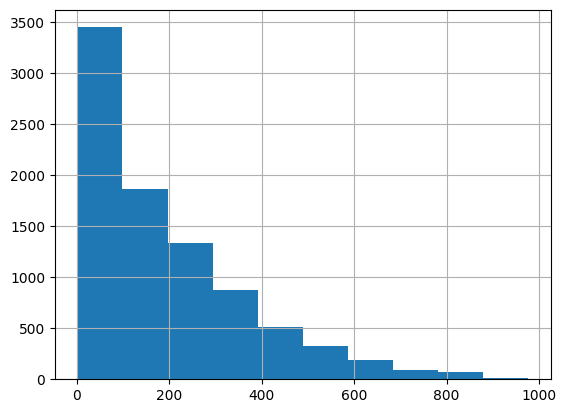

In [ ]:
# 변수 변환 및 스케일

from sklearn.preprocessing import PowerTransformer
import warnings
import matplotlib.pyplot as plt
np.warnings = warnings

bike_data = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/data/main/bike_train.csv")
bike_data['count'].hist();
plt.show();

In [ ]:
box_tr = PowerTransformer(method = 'box-cox')   # method = 'yeo-johnson'이 default
bike_data['count_boxcox'] = box_tr.fit_transform(bike_data[['count']])
print('lambda: ', box_tr.lambdas_)

lambda:  [0.31309736]


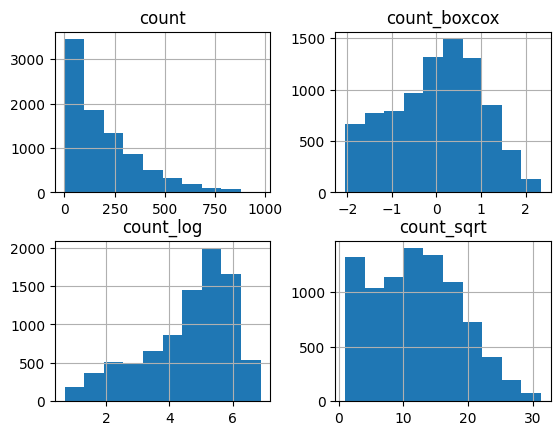

In [ ]:
# 로그 변환 : np.log1p()

bike_data['count_log'] = np.log1p(bike_data[['count']])

# 루트 변환 : np.sqrt()
bike_data['count_sqrt'] = np.sqrt(bike_data[['count']])

# 분포 비교

bike_data[['count', 'count_boxcox', 'count_log', 'count_sqrt']].hist();
plt.show();

In [9]:
# 표준화

from sklearn.preprocessing import StandardScaler

train_X9 = train_X.copy()
test_X9 = test_X.copy()

train_X9_num = train_X9.select_dtypes('number')
test_X9_num = test_X9.select_dtypes('number')

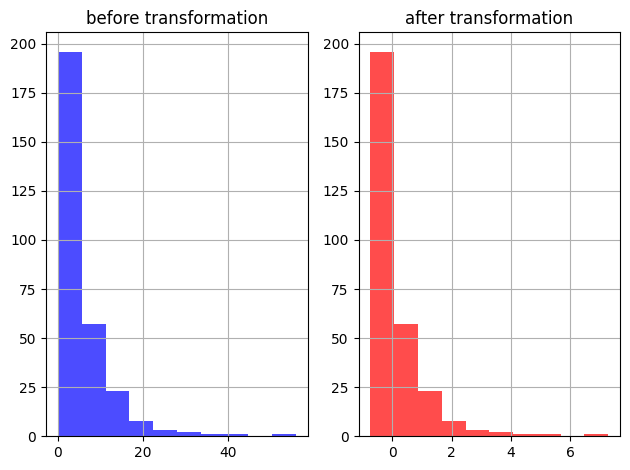

In [11]:
import matplotlib.pyplot as plt

stdscaler = StandardScaler().set_output(transform = 'pandas')
train_X9_num = stdscaler.fit_transform(train_X9_num)
test_X9_num = stdscaler.transform(test_X9_num)

fig, axs = plt.subplots(nrows=1, ncols=2)

# 그래프 그리기
train_X9['absences'].hist(ax = axs[0], color = 'blue', alpha=0.7)
train_X9_num['absences'].hist(ax = axs[1], color = 'red', alpha=0.7)
axs[0].set_title('before transformation')
axs[1].set_title('after transformation')

plt.tight_layout();
plt.show();

In [14]:
print('변환 전 평균: ', np.round(train_X9['absences'].mean()))
print('변환 후 평균: ', np.round(train_X9_num['absences'].mean()))
print('변환 전 표준편차: ',np.round(train_X9['absences'].std(), 2))
print('변환 후 표준편차: ', np.round(train_X9_num['absences'].std(), 2))

변환 전 평균:  5.0
변환 후 평균:  0.0
변환 전 표준편차:  7.0
변환 후 표준편차:  1.0


In [15]:
# Min-Max 정규화 : (x-최솟값)/(최댓값-최솟값)

from sklearn.preprocessing import MinMaxScaler

train_X10 = train_X.copy()
test_X10 = test_X.copy()

train_X10_num = train_X10.select_dtypes('number')
test_X10_num = test_X10.select_dtypes('number')

In [16]:
minmaxscaler = MinMaxScaler().set_output(transform = 'pandas')
train_X10_num = minmaxscaler.fit_transform(train_X10_num)
test_X10_num = minmaxscaler.transform(test_X10_num)

# 칼럼별 범위 계산
range_df = train_X10_num.select_dtypes('number').apply(lambda x: x.max() - x.min(), axis=0)
print("Range of each column:")
print(range_df)

Range of each column:
famrel      1.0
freetime    1.0
goout       1.0
Dalc        1.0
Walc        1.0
health      1.0
absences    1.0
dtype: float64


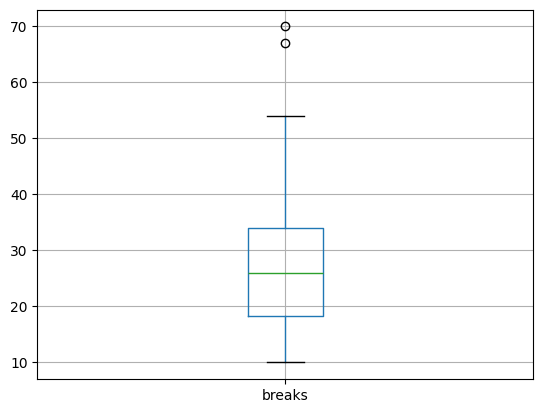

In [18]:
# 이상치 처리
# 상자 그림 예제 데이터 생성
warpbreaks = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/warpbreaks.csv')
warpbreaks.boxplot(column = ['breaks']);
plt.show();

In [28]:
# 1분위수 계산
Q1 = np.quantile(warpbreaks['breaks'], 0.25)
# 3분위수 계산
Q3 = np.quantile(warpbreaks['breaks'], 0.75)
IQR = Q3 - Q1

import numpy as np
UC = Q3 + (1.5*IQR) # 위 울타리
LC = Q1 - (1.5*IQR) # 아래 울타리
print(warpbreaks.loc[(warpbreaks.breaks > UC) | (warpbreaks.breaks < LC), :])

   breaks wool tension
4      70    A       L
8      67    A       L


In [25]:
# 부등호를 아래와 같이 바꾸어 이상치를 제외할 수 있습니다.
print(warpbreaks.loc[(warpbreaks.breaks <= UC) & (warpbreaks.breaks >= LC), :])

    breaks wool tension
0       26    A       L
1       30    A       L
2       54    A       L
3       25    A       L
5       52    A       L
6       51    A       L
7       26    A       L
9       18    A       M
10      21    A       M
11      29    A       M
12      17    A       M
13      12    A       M
14      18    A       M
15      35    A       M
16      30    A       M
17      36    A       M
18      36    A       H
19      21    A       H
20      24    A       H
21      18    A       H
22      10    A       H
23      43    A       H
24      28    A       H
25      15    A       H
26      26    A       H
27      27    B       L
28      14    B       L
29      29    B       L
30      19    B       L
31      29    B       L
32      31    B       L
33      41    B       L
34      20    B       L
35      44    B       L
36      42    B       M
37      26    B       M
38      19    B       M
39      16    B       M
40      39    B       M
41      28    B       M
42      21    B 

In [31]:
# Z-score를 이용한 방법

upper = warpbreaks['breaks'].mean() + (3*warpbreaks['breaks'].std())
lower = warpbreaks['breaks'].mean() - (3*warpbreaks['breaks'].std())

warpbreaks.loc[(warpbreaks.breaks > upper) | (warpbreaks.breaks < lower), :].head(3)

,breaks,wool,tension
4,70,A,L


In [33]:
# 이산화 방법
from sklearn.preprocessing import KBinsDiscretizer
X = np.array([[0,1,1,2,5,10,11,14,18]]).T

In [35]:
# 구간의 길이가 같도록 이산화
kbd = KBinsDiscretizer(n_bins =3,             # 구간의 개수3
                       strategy = 'uniform')  # 구간의 길이가 동일

X_bin = kbd.fit_transform(X).toarray()
print(kbd.bin_edges_)

[array([ 0.,  6., 12., 18.])]


In [36]:
# 분위수를 기준으로 이산화
kbd2 = KBinsDiscretizer(n_bins = 4,
                        strategy = 'quantile')    # 사분위수를 기준으로 이산화

X_bin2 = kbd2.fit_transform(X).toarray()
print(kbd2.bin_edges_)

[array([ 0.,  1.,  5., 11., 18.])]


In [37]:
# 위 결과를 보면 0~1, 1~5, 5~11, 11~18로 n_bins = 4이므로 사분위수를 기준으로 이산화된 것을 볼 수 있습니다.

# 다음의 방법으로 직접 사분위수 확인 가능
print(np.quantile(X,[0.25,0.5,0.75,1]))

[ 1.  5. 11. 18.]


In [38]:
# 구간을 임의로 설정하는 방법(KBinsDiscretizer 활용 X)

bins = [0,4,7,11,18]
labels = ['A', 'B', 'C', 'D']
X_bin3 = pd.cut(X.reshape(-1),
                bins = bins,    # 구간의 경계값 설정
                labels = labels # 각 구간의 label 설정
                )
print(X_bin3)

[NaN, 'A', 'A', 'A', 'B', 'C', 'C', 'D', 'D']
Categories (4, object): ['A' < 'B' < 'C' < 'D']


In [41]:
# make_column_transformer()와 ColumnTransformer (이산형 변수와 연속형 변수 한번에 전처리 하기)
from sklearn.compose import make_column_transformer

dat = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/bda1.csv')
y = dat.grade
X = dat.drop(['grade'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

# 칼럼명 구분하기
cat_columns = train_X.select_dtypes('object').columns
num_columns = train_X.select_dtypes('number').columns

In [45]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output = False,
                              drop = None,
                              handle_unknown = 'ignore')
stdscaler = StandardScaler()

mc_transformer = make_column_transformer(
    (onehotencoder, cat_columns),
    (stdscaler, num_columns),
    remainder = 'passthrough'
).set_output(transform = 'pandas')

train_X_transformed = mc_transformer.fit_transform(train_X)
test_X_transformed = mc_transformer.transform(test_X)

print(train_X_transformed.head())

     onehotencoder__school_GP  onehotencoder__school_MS  onehotencoder__sex_F  \
63                        1.0                       0.0                   1.0   
241                       1.0                       0.0                   0.0   
306                       1.0                       0.0                   1.0   
317                       1.0                       0.0                   0.0   
245                       1.0                       0.0                   1.0   

     onehotencoder__sex_M  onehotencoder__paid_no  onehotencoder__paid_yes  \
63                    0.0                     0.0                      1.0   
241                   1.0                     1.0                      0.0   
306                   0.0                     0.0                      1.0   
317                   1.0                     1.0                      0.0   
245                   0.0                     0.0                      1.0   

     standardscaler__famrel  standardscaler_

In [46]:
from sklearn.compose import ColumnTransformer

onehotencoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
stdscaler = StandardScaler()

In [47]:
c_transformer = ColumnTransformer(
    transformers = [
        ('cat', onehotencoder, cat_columns),  # 범주형 변수 전처리 객체에 'cat' 별칭 부여
        ('num', stdscaler, num_columns)       # 수치형 변수 전처리 객체에 'num' 별칭 부여
    ]
).set_output(transform = 'pandas')

train_X2_transformed = c_transformer.fit_transform(train_X)
test_X2_transformed = c_transformer.transform(test_X)

print(train_X2_transformed.head())

     cat__school_GP  cat__school_MS  cat__sex_F  cat__sex_M  cat__paid_no  \
63              1.0             0.0         1.0         0.0           0.0   
241             1.0             0.0         0.0         1.0           1.0   
306             1.0             0.0         1.0         0.0           0.0   
317             1.0             0.0         0.0         1.0           1.0   
245             1.0             0.0         1.0         0.0           0.0   

     cat__paid_yes  num__famrel  num__freetime  num__goout  num__Dalc  \
63             1.0     0.087029      -2.303087   -0.082988  -0.526353   
241            0.0     1.191925      -0.237030   -0.989471  -0.526353   
306            1.0     0.087029      -0.237030   -0.082988  -0.526353   
317            0.0     0.087029      -0.237030   -0.082988   0.579367   
245            1.0     0.087029      -0.237030    0.823496   0.579367   

     num__Walc  num__health  num__absences  
63    0.565046     0.311139      -0.448408  
241  -0.

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/df_5.csv')
df.columns = ['index', 'X100m', 'Long.jump', 'Shot.put', 'High.jump', 'X400m',
              'X110m.hurdle', 'Discus', 'Pole.vault', 'Javeline', 'X1500m']
df.set_index('index',inplace=True)
print(df.head())
print(df.shape)

           X100m  Long.jump  Shot.put  High.jump  X400m  X110m.hurdle  Discus  \
index                                                                           
SEBRLE     11.04       7.58     14.83       2.07  49.81         14.69   43.75   
CLAY       10.76       7.40     14.26       1.86  49.37         14.05   50.72   
BERNARD    11.02       7.23     14.25       1.92  48.93         14.99   40.87   
YURKOV     11.34       7.09     15.19       2.10  50.42         15.31   46.26   
ZSIVOCZKY  11.13       7.30     13.48       2.01  48.62         14.17   45.67   

           Pole.vault  Javeline  X1500m  
index                                    
SEBRLE           5.02     63.19   291.7  
CLAY             4.92     60.15   301.5  
BERNARD          5.32     62.77   280.1  
YURKOV           4.72     63.44   276.4  
ZSIVOCZKY        4.42     55.37   268.0  
(23, 10)


In [50]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10,    # 주성분의 수(줄이고 싶은 차원의 수)
          svd_solver = 'auto')  # 주성분 분석 계산 방식

X_train_pca = pca.fit_transform(train_scaled)
X_test_pca = pca.transform(test_scaled)

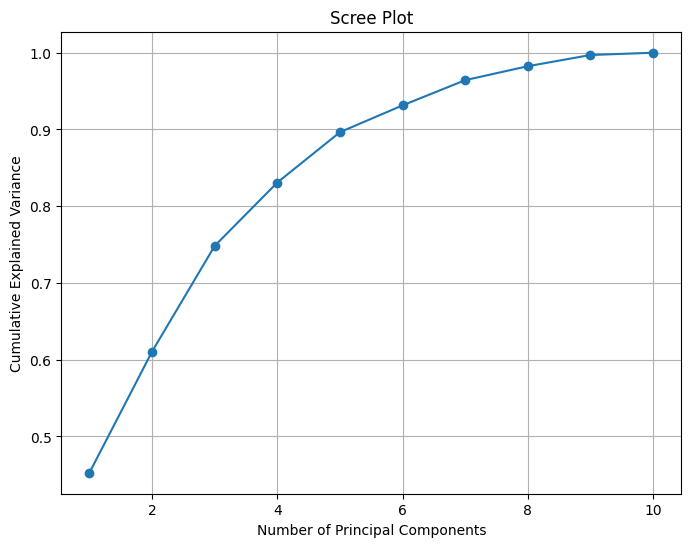

In [54]:
import matplotlib.pyplot as plt
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# 스크리 플롯 그리기
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_explained_variance) +1),
         cumulative_explained_variance, marker='o', linestyle = '-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [55]:
pca = PCA(n_components = 0.8,   # 설명되는 누적 분산의 비율 80%로 설정
          svd_solver = 'full')  # 주성분 분석 계산 방식

X_train_pca = pca.fit_transform(train_scaled)
X_test_pca = pca.transform(test_scaled)

In [56]:
print(pca.explained_variance_ratio_)    # 각 주성분이 설명하는 분산의 비율
print(pca.n_components_)                # 주성분 개수

[0.45268178 0.15791668 0.1376982  0.08256299]
4


In [58]:
# 데이터 누수(Data Leakage)

# 예제 데이터 생성
from sklearn.preprocessing import StandardScaler
trainX = pd.DataFrame({'x1': range(1,9,1), 'x2':range(15,23,1)})
testX = pd.DataFrame({'x1': [1,3,5], 'x2': [2,4,6]})

   x1  x2
0   1  15
1   2  16
2   3  17
3   4  18
4   5  19
5   6  20
6   7  21
7   8  22


In [60]:
# 올바른 방법

stdscaler = StandardScaler()
trainX2 = stdscaler.fit_transform(trainX)
testX2 = stdscaler.transform(testX)

# 일반 정규화식(비교)
print('일반 정규화식: ', (1 - np.mean(trainX['x1'])) / np.std(trainX['x1']))

# 변환 결과
print('trainX 1의 표준화 변환 결과: ', trainX2[0,0])
print('testX 1의 표준화 변환 결과: ', testX2[0,0])

일반 정규화식:  -1.5275252316519468
trainX 1의 표준화 변환 결과:  -1.5275252316519468
testX 1의 표준화 변환 결과:  -1.5275252316519468


In [ ]:
# 잘못된 방법(1)
# 전체 데이터로 .fit_transform()을 적용하여 표준화 변환 후 train/test 분할

all_data = pd.concat([trainX, testX], axis=0)
stdscaler2 = StandardScaler()
all_data_transformed = stdscaler2.fit_transform(all_data)

trainX3, testX3 = train_test_split(all_data_transformed, test_size = 0.2, shuffle = False)
print('trainX 1의 표준화 변환 결과')

In [61]:
# train/test 분할 후 .fit_transform()을 적용하여 표준화 변환

trainX = pd.DataFrame({'x1': range(1,9,1), 'x2':range(15,23,1)})
testX = pd.DataFrame({'x1':[1,3,5], 'x2': [2,4,6]})

stdscaler3 = StandardScaler()
trainX4 = stdscaler3.fit_transform(trainX)

stdscaler4 = StandardScaler()
testX4 = stdscaler4.fit_transform(testX)

print('trainX 1의 표준화 변환 결과: ', trainX4[0,0])
print('testX 1의 표준화 변환 결과: ', testX4[0,0])

trainX 1의 표준화 변환 결과:  -1.5275252316519468
testX 1의 표준화 변환 결과:  -1.224744871391589
